In [2]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data_app = pd.read_csv(
    "/home/natalia/Рабочий стол/new/Home_credit/application_train.csv",
    sep=",",
    encoding="cp1251",
)

In [4]:
target = data_app["TARGET"]

In [5]:
X = data_app.drop(["SK_ID_CURR", "TARGET"], axis=1)

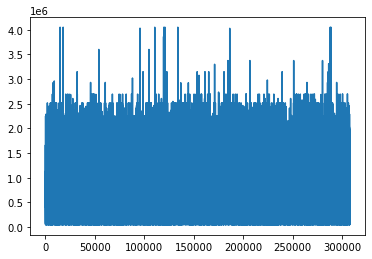

In [6]:
index = np.arange(0, len(data_app["TARGET"]))
plt.plot(index,data_app["AMT_CREDIT"])

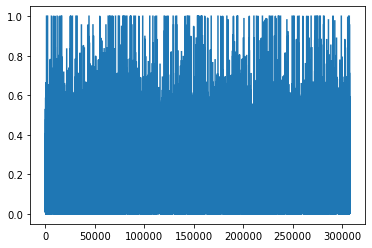

In [7]:
plt.plot(index,data_app["APARTMENTS_AVG"])

In [8]:
ones = 0
for i in target:
    if i == 1:
        ones += 1
percent_ones = ones/len(target) * 100
print('percent ones', percent_ones)
print('percent zeros', 100 - percent_ones) 

percent ones 8.072881945686495
percent zeros 91.92711805431351


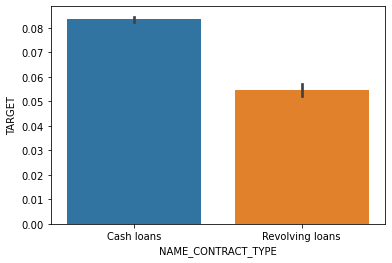

In [9]:
ax = sns.barplot(x = "NAME_CONTRACT_TYPE", y = "TARGET", data = data_app)

Text(0, 0.5, 'percent')

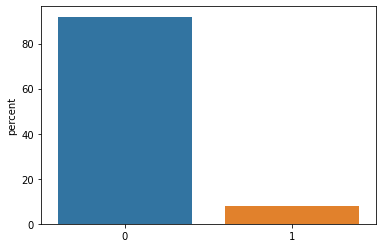

In [10]:
ax = sns.barplot(x = [0,1], y = [100 - percent_ones, percent_ones])
ax.set_ylabel("target")
ax.set_ylabel("percent")

In [22]:
train_test = data_app.head(int(len(target)*0.8))

In [23]:
valid = data_app.iloc[int(len(target)*0.8):,:]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3)

In [72]:
cat_features = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", 
                "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", 
                "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", 
                "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE"
               ]
params = {'learning_rate': 0.05,
              'num_iterations': 500,
              'max_depth': 7,
              'early_stopping_round': 30
         
         }

In [50]:
for feature in cat_features:
    data_app[feature] = data_app[feature].astype("category")

In [66]:
model = LGBMClassifier(params)

In [52]:
type(X_train)
X_train.dtypes

NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 120, dtype: object

In [67]:
model.fit(X_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE, WEEKDAY_APPR_PROCESS_START, ORGANIZATION_TYPE, FONDKAPREMONT_MODE, HOUSETYPE_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE

In [ ]:
y_hat = model.predict(X_test)

In [ ]:
score = roc_auc_score(y_test,y_hat)

In [ ]:
lightgbm.plot_importance(model)